In [49]:
import pandas as pd  # make data frame ARE IN STRUCTURED TABULAR FORM #EASIER TO ANLAYISE AND DO PROCESSSING ON DATASET #library
import matplotlib.pyplot as plt # used for ploting or draw a line or ploting a graph #data visualisation #library
import seaborn as sns #vislise random distribuition or library use in #library
from sklearn.model_selection import train_test_split #sk learn  IS Library split original data into train data and test data this function is useful sor this # test is used for accuracy of model #train means create the model
from sklearn.linear_model import LinearRegression # algorthim or statical method for predict anlaysis relationship between the data-points to draw a straight line through all them.This line can be used to predict future values.
from sklearn.linear_model import Lasso # modifies the loss function by adding the penalty (shrinkage quantity) equivalent to the summation of the absolute value of coefficients.
from sklearn import metrics #evalute our model by find error score accuracies etc

In [16]:
#data collectiopn and processing
#loading the data from car file to pandas dataframe
car_dataset=pd.read_csv("car data.csv")#pandas has a  function read_csv loading csv file to a data frame

In [13]:
car_dataset.head() # head functionprint the first 5 rows of the data #cardataset is the name of data frame

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
# checking the no of row and coloum by function shape
car_dataset.shape

(301, 9)

In [18]:
#getting some information of dataset opr dataframe
car_dataset.info() #object means categories of data petrol diesal or cng in datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [19]:
#checking the no of missing values
car_dataset.isnull().sum()#how many missingh values of each column

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [24]:
#checking the distribution of categorical data 
print(car_dataset.Fuel_Type.value_counts())#value counts count or no of the for petrol and diesal
print(car_dataset.Selling_type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [35]:
#ml model cannot understand text so that converted into numerical values 
#encoding the categorical data fuel type coloumn
car_dataset.replace({"Fuel_Type":{'Petrol':0, 'Diesel':1,'CNG':2}},inplace=True)#for changing the value use inplace parameters
#encoding the categorical data fuel type coloumn
car_dataset.replace({"Selling_type":{'Dealer':0,'Individual':1}},inplace=True)
#encoding the categorical data fuel type coloumn
car_dataset.replace({"Transmission":{'Manual':0,'Automatic':1}},inplace=True)

In [36]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [41]:
#spliting the data and target data
#selling price target and othr features becomes the data
#remove selling price and store it into y all the remaing features were come in X variable REMOVE CAR NAME BECAUSE IT CANNOT BE USED IN THE PREDICTION
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1) #droping a coloumn axis 1 dropping a row axis 0
Y=car_dataset['Selling_Price']

In [39]:
print(X)


     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [43]:
print(Y) #3.35 means 3 lakh 35000 indian rupees# target variable orprice of the car which we want to analyse

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [45]:
#spliting traing and test data #seperate data into training data and test data #traing data in the variable x train test data in the variable x test # thenprice of  all the values in th x train will be stored in y train #all the price value of x test  will be stored in the y test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y ,test_size= 0.1, random_state=2)#10 %testdata 90% training data# dataset large prediction will be better

In [77]:
X_train

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
204,2015,4.430,28282,0,0,0,0
249,2016,7.600,17000,0,0,0,0
277,2015,13.600,21780,0,0,0,0
194,2008,0.787,50000,0,1,0,0
244,2013,9.400,49000,1,0,0,0
...,...,...,...,...,...,...,...
75,2015,6.800,36000,0,0,0,0
22,2011,8.010,50000,0,0,1,0
72,2013,18.610,56001,0,0,0,0
15,2016,10.790,43000,1,0,0,0


In [78]:
Y_train

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 270, dtype: float64

In [79]:
X_test

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
99,2010,20.450,50024,1,0,0,0
161,2014,0.826,23000,0,1,0,0
89,2014,6.760,40000,0,0,0,0
30,2012,5.980,51439,1,0,0,0
232,2015,14.790,12900,0,0,1,0
290,2014,6.400,19000,0,0,0,0
35,2011,7.740,49998,2,0,0,0
7,2015,8.610,33429,1,0,0,0
183,2013,0.470,21000,0,1,0,0
13,2015,7.710,26000,0,0,0,0


In [80]:
Y_test

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64

In [50]:
#model traing
#linear regreesion model loading to a variable called lin_rig_model
lin_reg_model = LinearRegression()

In [ ]:
#fit our data to the linear regression model

In [51]:
#fit fuction is used to train our model#linear regression is just a line equ y=mx+c 
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [52]:
#evalute our model
#prediction on training data by using a function.predict# predict the price value baesd on other data we are giving  
training_data_prediction =lin_reg_model.predict(X_train) 

In [81]:
lin_reg_model.predict(X_train) 

array([ 3.73021336e+00,  5.60557769e+00,  7.79651028e+00, -1.87998528e+00,
        6.71732485e+00,  8.14298867e+00,  5.83860743e+00,  6.17807702e+00,
        6.16007875e+00,  1.59435570e+01,  2.15178639e+00,  1.11542236e+00,
       -4.03566158e-01,  6.69018458e+00,  6.81730001e+00,  1.02823074e+00,
        6.74434076e+00,  1.43840178e+01,  2.99972885e+00,  7.95100696e+00,
       -8.35827371e-01,  9.01998153e+00,  1.21122729e+00,  2.19835982e+00,
       -8.22859063e-01,  7.52654580e-01,  1.00169815e+01, -4.06906872e-01,
       -2.39970547e+00,  9.99810395e+00,  6.81635445e+00,  1.09134689e+00,
        4.36005070e+00,  9.35912908e-02,  3.49554774e+00,  2.78126418e+00,
        1.50310108e+00,  4.66039889e-01,  1.68540670e+00,  1.18623031e+00,
        4.32915189e+00,  6.09991944e+00,  9.49841057e-01,  7.57239833e-01,
        6.06044794e+00,  3.49340827e+00,  2.40754453e+00,  7.52178300e+00,
        4.63218039e+00,  4.44151068e+00,  4.22818099e+00,  2.71097979e+00,
        4.46834250e+00,  

In [82]:
Y_test


99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64

In [54]:
# compare value predicted our model by original value r squaed error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R squared Error:',error_score)

R squared Error: 0.8796483009370206


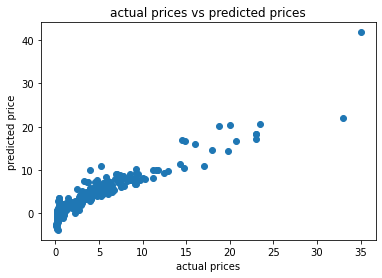

In [57]:
#visualize the actual prices or predicted price
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()# values are predict by our model is veery close as sold price#estamiationg model performance by plotting the original values in cases of scatter plot 

In [60]:
#prediction on test data by using a function.predict
test_data_prediction =lin_reg_model.predict(X_test) 

In [61]:
#compare value predicted our model by original value r squaed error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared Error:',error_score)

R squared Error: 0.8365861023208354


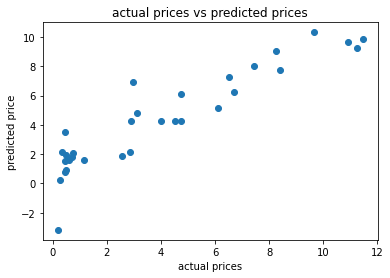

In [62]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

In [ ]:
#linear regresion perform well in those caese were one value increase other also increase
#when there is multe features and multiple column then we will use lasso and other regression

In [64]:
#model traing
lasso_reg_model = Lasso()

In [65]:
#fit our data to the linear regression model

In [66]:

lasso_reg_model.fit(X_train,Y_train

Lasso()

In [67]:
#evalute our model
#prediction on training data by using a function.predict# predict the price value baesd on other data we are giving  
training_data_prediction =lasso_reg_model.predict(X_train) 

In [68]:
# compare value predicted our model by original value r squaed error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R squared Error:',error_score)

R squared Error: 0.8424480718240743


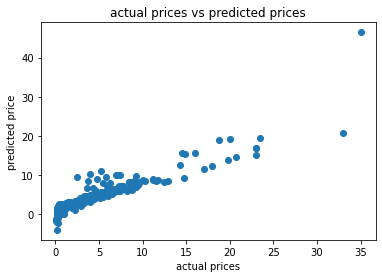

In [69]:
#visualize the actual prices or predicted price
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()# values are predict by our model is veery close as sold price#estamiationg model performance by plotting the original values in cases of scatter plot 

In [ ]:
#in lasso regreesion value is much more closer thenlinear regression so lasso is much more good phir for this particular project

In [73]:
#prediction on test data by using a function.predict
test_data_prediction =lasso_reg_model.predict(X_test) 

In [74]:
#compare value predicted our model by original value r squaed error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared Error:',error_score)

R squared Error: 0.8709763132343395


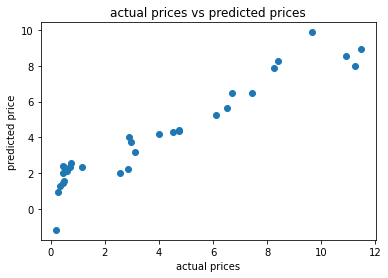

In [76]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

In [ ]:
# in this case distance is not much more higher so lasso in testing is also god fit for this project